# Lab 2
Le domaine spatiale

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import math
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

In [57]:
def tchebychev_auto(size:int, dtype) -> np.ndarray:
    assert(size > 0 and (size - 1) % 2 == 0)
    array = np.full((size,size), size // 2, dtype = dtype)
    for iter in range(1, math.ceil(size / 2)):
        array[iter:size - iter, iter:size - iter] -= 1
    return array


In [58]:
tchebychev = tchebychev_auto(5, int)
print(tchebychev)

[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

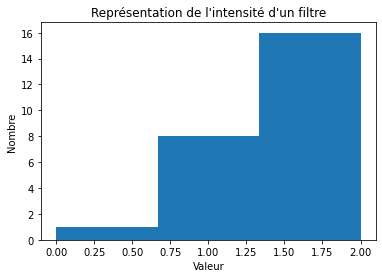

In [59]:
tchebychev_hist = tchebychev.flatten()
plt.hist(tchebychev_hist, 3)
plt.xlabel("Valeur")
plt.ylabel("Nombre")
plt.title("Représentation de l'intensité d'un filtre")
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

In [60]:

def eucl_auto(size:int, dtype) -> np.ndarray:
    assert(size > 0 and (size - 1) % 2 == 0)
    array = np.zeros((size, size), dtype=dtype)
    center = size // 2
    for x in range(size):
        for y in range(size):
            array[x, y] = math.sqrt(((x - center)**2 + (y - center)**2))
    return array

[[2.82842712 2.23606798 2.         2.23606798 2.82842712]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.         1.         0.         1.         2.        ]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.         2.23606798 2.82842712]]


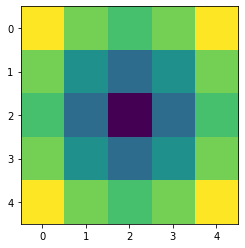

In [67]:
eucli = eucl_auto(5, float)
eucli_n = (eucli - eucli.min()) / (eucli.max() - eucli.min())
print(eucli)
plt.imshow(eucli_n)
plt.show()

## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

[[0.         0.20943058 0.29289322 0.20943058 0.        ]
 [0.20943058 0.5        0.64644661 0.5        0.20943058]
 [0.29289322 0.64644661 1.         0.64644661 0.29289322]
 [0.20943058 0.5        0.64644661 0.5        0.20943058]
 [0.         0.20943058 0.29289322 0.20943058 0.        ]]


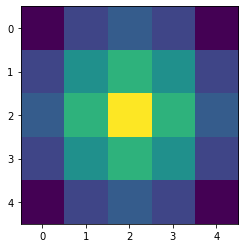

In [68]:
eucli_i = 1 - eucli_n
print(eucli_i)
plt.imshow(eucli_i)
plt.show()

## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation?

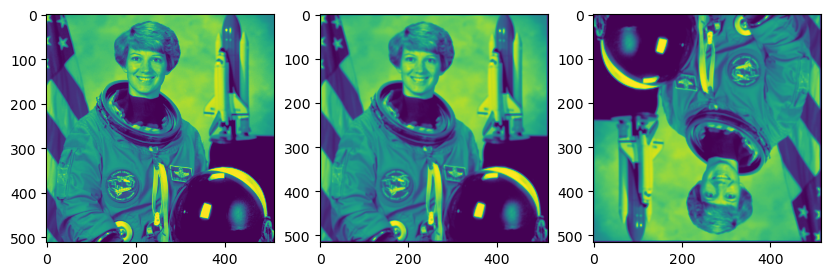

In [75]:
img = color.rgb2gray(data.astronaut())
plt.figure(figsize=(10,10), dpi=100)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(signal.convolve2d(eucli_i, img))

plt.subplot(133)
plt.imshow(signal.correlate2d(eucli_i, img))

plt.show()

## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter les sections TODO

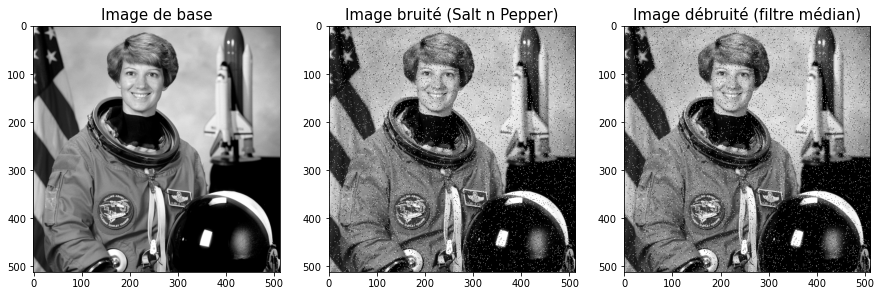

In [64]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

# Padding
padding = ...  #TODO

# Apply median filter on img using padding
# TODO

plt.imshow(img, cmap='gray')

plt.show()

## Exercice 7
Quiz sur différent résultat de convolution?

In [65]:
...

Ellipsis

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)